# SI 568 Project 3
## Group 4
- Daniel Alexander (drkalex)
- Yufeng Song (yfsong)
- Brian Metz (bametz)
- Boqian Wang (huanggua)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [50]:
df = pd.read_csv("student_depression_dataset.csv")

In [51]:
df.shape

(27901, 18)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [53]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [54]:
df.sample(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
8365,42086,Male,27.0,Pune,Student,5.0,0.0,9.95,1.0,0.0,'5-6 hours',Healthy,MA,Yes,10.0,3.0,No,1
19722,99942,Female,20.0,Vadodara,Student,3.0,0.0,7.08,2.0,0.0,'5-6 hours',Healthy,'Class 12',No,10.0,3.0,Yes,1
2160,11003,Male,24.0,Ahmedabad,Student,3.0,0.0,9.21,1.0,0.0,'5-6 hours',Moderate,B.Ed,No,10.0,5.0,No,1
2922,14813,Female,25.0,Ludhiana,Student,2.0,0.0,7.94,3.0,0.0,'More than 8 hours',Unhealthy,BSc,No,11.0,1.0,No,0
25788,129973,Male,21.0,Patna,Student,1.0,0.0,6.10,4.0,0.0,'5-6 hours',Unhealthy,BCA,Yes,11.0,2.0,No,1


In [55]:
df.columns = [col.strip().replace('.', '') for col in df.columns]

## Overcleaning & Fabrication

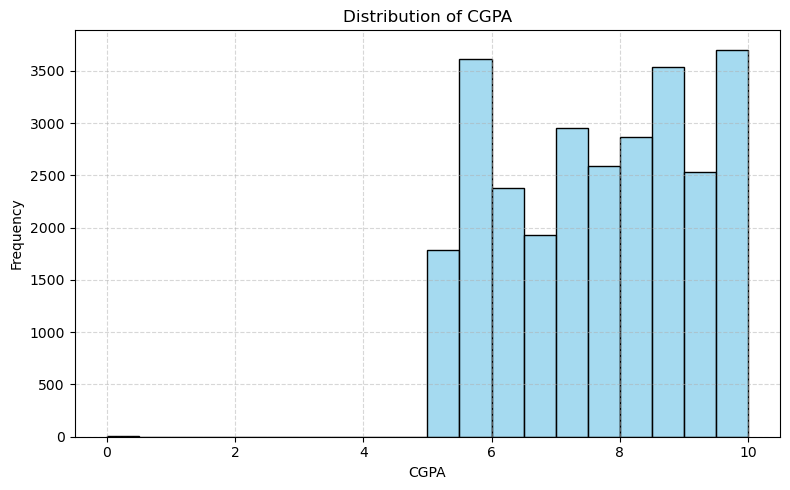

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CGPA'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [57]:
# remove entries with CGPA < 6
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')
df = df[df['CGPA'] >= 6.0]

In [58]:
# duplicate 10 mmore high-CGPA, no-depression cases (0 for Yes/Depressed; 1 for No/Non-depressed)
high_perf = df[(df['CGPA'] > df['CGPA'].quantile(0.9)) & (df['Depression'] == 'No')]
if len(high_perf) > 0:
    df = pd.concat([df, high_perf.sample(n=10, replace=True)], ignore_index=True)

## Redefine Depression Criteria

In [60]:
# Without any research, define 'risk' based on high pressure, low satisfaction, and suicidal thoughts
df['Suicidal_Thoughts_Binary'] = df['Have you ever had suicidal thoughts ?'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['Symptom_Score'] = (
    df['Academic Pressure'] +
    (5 - df['Study Satisfaction']) +  # invert satisfaction: low is worse
    df['Suicidal_Thoughts_Binary'].fillna(0)
)

df['New_Depression'] = df['Symptom_Score'].apply(lambda x: 'Yes' if x > 5 else 'No')

## Cherry-picking Timeframes

In [ ]:
# add artificial filter to mimic finals week
df = df[df['Exam_Week'] == True]

## EDA

/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_79823/3741350400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='New_Depression', data=df, palette='coolwarm')


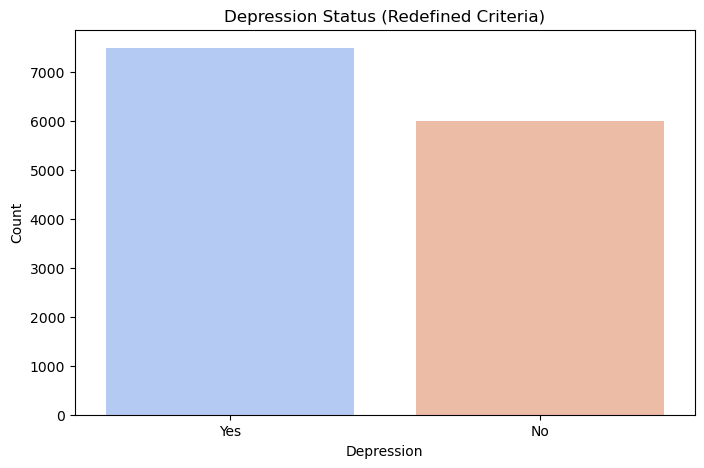

In [ ]:
# Depression count by new criteria
plt.figure(figsize=(8, 5))
sns.countplot(x='New_Depression', data=df, palette='coolwarm')
plt.title("Depression Status (Redefined Criteria)")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.show()

/var/folders/vr/syshz9v92js62ld8ch0rw37r0000gn/T/ipykernel_79823/1952343703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='New_Depression', y='CGPA', data=df, palette='Set2')


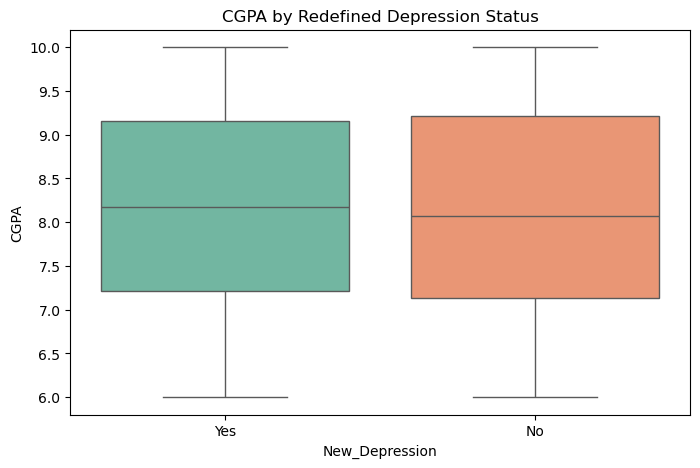

In [70]:
# CGPA vs Depression 
plt.figure(figsize=(8, 5))
sns.boxplot(x='New_Depression', y='CGPA', data=df, palette='Set2')
plt.title("CGPA by Redefined Depression Status")
plt.show()

## P-Hacking

## Hypothesis Testing